In [1]:
%%capture
!pip install geoplot;

In [2]:
from shapely.geometry import Point, MultiPoint, Polygon, MultiPolygon

import geopandas as gpd
import matplotlib.pyplot as plt

import geoplot
import numpy as np

import pandas as pd
import json    
import pprint   
pp = pprint.PrettyPrinter()

<font size="4">__Initial Analysis of flood data__

# Problem statement 1: Does flood occur more often in Taipei? </font>

In [3]:
df_flood = gpd.read_file('NCDR_W84_FloodPoint_2018.shp', encoding='utf-8')  # load flood data

df_flood['nYear'] = df_flood['nYear'].astype(int) + 1911  # transfer Taiwanese calendar to AD

df_flood.loc[df_flood['CityName'] == '臺北市'].head()  # identify floods in Taipei City

,RecDate,EventName,CityName,TownName,Location,DataSource,nCityName,nCity,nTownName,nTown,nVillName,nVill,nTWD97_X,nTWD97_Y,nWGS84_Lon,nWGS84_Lat,Grid500,nYear,nEven,geometry
44,2013,TRAMI,臺北市,士林區,臺北市士林區福林里,EMIS-NCDR,臺北市,63000,士林區,63000110,福林里,63000110003,303157.00,2775537.00,121.526987,25.087176,121.525_25.085,2013,102潭美颱風,POINT (121.5269874514098 25.0871756031716)
45,2013,TRAMI,臺北市,士林區,臺北市士林區三玉里,"EMIS-NCDR,WRAEMIS",臺北市,63000,士林區,63000110,三玉里,63000110033,304062.00,2778933.00,121.536093,25.117802,121.535_25.115,2013,102潭美颱風,POINT (121.5360927642697 25.11780208559782)
47,2013,TRAMI,臺北市,松山區,臺北市松山區安平里,"EMIS-NCDR,WRAEMIS",臺北市,63000,松山區,63000010,安平里,63000010019,307394.72,2771630.75,121.568835,25.051755,121.570_25.050,2013,102潭美颱風,POINT (121.5688348343601 25.05175541138317)
48,2013,TRAMI,臺北市,士林區,臺北市士林區福中里,EMIS-NCDR,臺北市,63000,士林區,63000110,福中里,63000110009,301896.50,2775461.25,121.514489,25.086536,121.515_25.085,2013,102潭美颱風,POINT (121.5144886592243 25.0865355916443)
49,2013,TRAMI,臺北市,士林區,臺北市士林區天祿里,EMIS-NCDR,臺北市,63000,士林區,63000110,天祿里,63000110037,303249.03,2778530.75,121.528016,25.114200,121.525_25.115,2013,102潭美颱風,POINT (121.5280158261695 25.11419956156055)


[]

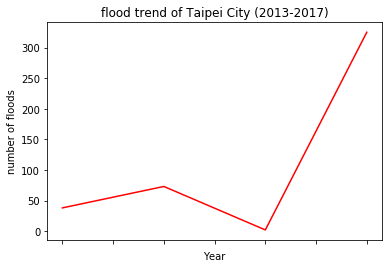

In [4]:
flood = df_flood.loc[df_flood['CityName'] == '臺北市'] # create new variable 'flood' to represent taipei city floods

frequency = flood['Location'].groupby(flood['nYear'].astype(str)).count().plot(c='r') # plot floods by year 
frequency.set_title('flood trend of Taipei City (2013-2017)')
frequency.set_xlabel('Year')
frequency.set_ylabel('number of floods')

plt.plot()

<font size = "4"> __Upload Taipei City Map__<font>


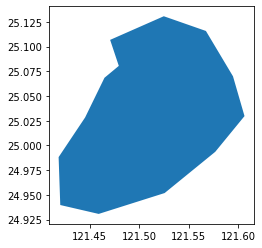

In [5]:
df_taiwan = gpd.read_file('TWN_adm2.shp')  # upload city map from DivaGis
df_taiwan  # find ID of Taipei City: ID_1 == 3
df_taiwan.loc[df_taiwan['ID_1'] ==3].plot() # I might need more precise map as this data contain no town boundaries...

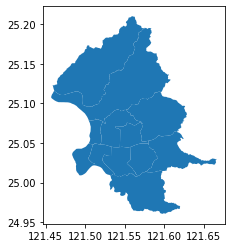

In [6]:
df_taiwan = gpd.read_file('TOWN_MOI_1081121.shp', encoding='utf-8')  # upload city map from another source

df_taiwan # find ID of Taipei City: COUNTYNAME == '臺北市'
taipei = df_taiwan.loc[df_taiwan['COUNTYNAME'] == '臺北市']

df_taiwan.loc[df_taiwan['COUNTYNAME'] == '臺北市'].plot() # Plot Taipei City again. 

# wow, comparing with this, the previous one doesn't even "look like" the same place, so weird!


/srv/app/venv/lib/python3.6/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)
/srv/app/venv/lib/python3.6/site-packages/descartes/patch.py:87: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return PathPatch(PolygonPath(polygon), **kwargs)


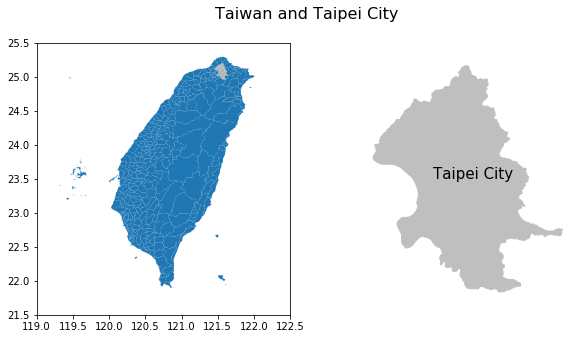

In [7]:
# Map Taiwan and Taipei City in subplots and save it as .png 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5) )

# axes[0]: indexing the boundary to make Taiwan center and bigger
xlim = (119, 122.5)
ylim = (21.5, 25.5)

axes[0].set_xlim(xlim)
axes[0].set_ylim(ylim)

df_taiwan.plot(axes = axes[0])
taipei.plot(axes = axes[0], color = '0.75')

# axes[1]: plot taipei city, use geoplot to make the plot look simpler 
geoplot.polyplot(taipei, ax=axes[1], color = '0.75')
axes[1].text(0.7, 0.5, 'Taipei City', 
        transform=axes[1].transAxes, ha="right", fontsize = 15)

fig.suptitle('Taiwan and Taipei City', fontsize=16)
plt.plot()

plt.savefig('Taiwan_and_Taipei.png')

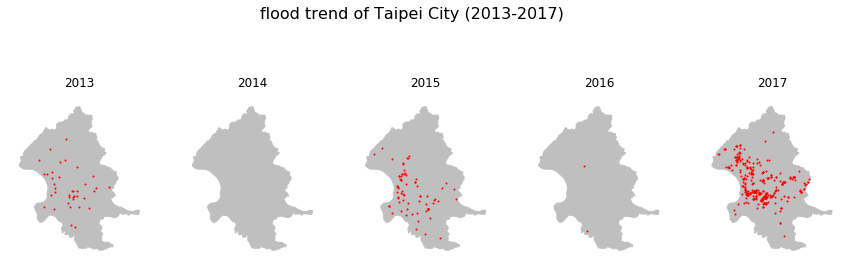

In [8]:
# visualize flood trend in taipei city

fig, axes = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(15, 5) )

for i in range(5): 
    geoplot.polyplot(taipei, ax=axes[i], color = '0.75')
    #flood.loc[flood['nYear'] == 2013+i].plot(axes=axes[i], markersize = 1, c = 'r')
    axes[i].set_title(2013+i)

    
flood.loc[flood['nYear'] == 2013].plot(axes=axes[0], markersize = 1, c = 'r')
#flood.loc[flood['nYear'] == 2014].plot(axes=axes[1], markersize = 1, c = 'r') 
# it seems that because there was no flood recorded in 2014, this line doesn't work in datahub. 
# However, it did work in my local anaconda version. 

flood.loc[flood['nYear'] == 2015].plot(axes=axes[2], markersize = 1, c = 'r')
flood.loc[flood['nYear'] == 2016].plot(axes=axes[3], markersize = 1, c = 'r')
flood.loc[flood['nYear'] == 2017].plot(axes=axes[4], markersize = 1, c = 'r')

fig.suptitle('flood trend of Taipei City (2013-2017)', fontsize=16)
plt.xlabel('longitude', x = -2)
axes[0].set_ylabel('latitude')
plt.plot()

plt.savefig('flood_trend.png')

<font size = '4'> __Work on the housing data__<font>

In [9]:
pip install xlrd

  Using cached https://files.pythonhosted.org/packages/b0/16/63576a1a001752e34bf8ea62e367997530dc553b689356b9879339cf45a4/xlrd-1.2.0-py2.py3-none-any.whl
You are using pip version 9.0.3, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
# load the house data that I have preliminarily cleaned in Excel (changed Taiwan year to AD, filtered out non-housing 
#data, filtered out transactions of parking spaces and industrial plants and deleted some irrelevant columns) 
housing_data = pd.read_excel('houseprice_2012_2018.xlsx')
housing_data.head()

,Column1,Column2,Column3,Column32,Column4,Column5,Column6,Column7,Column8,Column9,Column92,Column10,Column11,Column12,Column13,Column16,Column17,Column18
0,The villages and towns urban district,land sector position building sector house num...,land shifting total area square meter,transaction_date,transaction year month and day,transaction pen number,shifting level,total floor number,building state,main use,construction_date,construction to complete the years,building shifting total area,Building present situation pattern - room,building present situation pattern - hall,total price NTD,price_per_sqm,serial number
1,大安區,台北市大安區和平東路三段1巷72弄1~30號,19.39,20120629,1010629,土地1建物2車位0,五層,十七層,住宅大樓(11層含以上有電梯),國民住宅,19850522,0740522,100.97999999999999,3,2,18680000,184999,RPQNMLSJQHHFFFA08CA
2,內湖區,台北市內湖區民權東路六段90巷6弄1~30號,32.41,20120710,1010710,土地1建物1車位0,三層,五層,公寓(5樓含以下無電梯),住家用,19801114,0691114,104.11,3,1,14000000,134473,RPPPMLPKQHHFFCA67CA
3,松山區,台北市松山區三民路68巷1~30號,35.53,20120717,1010717,土地1建物1車位0,七層,七層,華廈(10層含以下有電梯),國民住宅,19920303,0810303,146.66,3,2,25800000,175917,RPOQMLPJKHIFFDA27DA
4,士林區,台北市士林區承德路四段10巷1~30號,31.2,20120720,1010720,土地1建物1車位0,一層,五層,公寓(5樓含以下無電梯),住家用,19790828,0680828,105.04,2,1,19000000,180883,RPSOMLPJRHHFFEA18DA


In [11]:
housing_data['Column2'].describe()

# Describe() shows that among all entries, more than 5000 addresses are not unique - indicate that there are multiple 
# house transactions happening among the years around the same places - a good sign for further analysis!

count               11588
unique               6485
top       臺北市北投區泉源路31~60號
freq                   50
Name: Column2, dtype: object

In [12]:
# To identify house price change, we need to have at least two house transcations of the same place over the period.
# Therefore, I first search for addresses that have appeared at least twice in the file. 

# define empty array
multi_record_address = []  # addresses that have appeared more than once in the dataframe
single_record_address = [] # addressese that have appeared ONLY once in the dataframe


# loop through all rows
address_counter = {}
for i in range(len(housing_data)):
    address = housing_data['Column2'][i]
    if address not in address_counter:
        address_counter[address] = 0
    address_counter[address] += 1

for k, v in address_counter.items():
    if v > 1:
        multi_record_address.append(k)
    else:
        single_record_address.append(k)

        
print("%i multiple addresses" % len(multi_record_address)) 
print("%i single record addresses found" % len(single_record_address))



2500 multiple addresses
3985 single record addresses found


In [13]:
# all the house transactions of which the address appear more than once in the dataframe: 
housing_data_clean = housing_data[~housing_data.Column2.isin(single_record_address)]
len(housing_data_clean)
housing_data_clean.head()

,Column1,Column2,Column3,Column32,Column4,Column5,Column6,Column7,Column8,Column9,Column92,Column10,Column11,Column12,Column13,Column16,Column17,Column18
3,松山區,台北市松山區三民路68巷1~30號,35.53,20120717,1010717,土地1建物1車位0,七層,七層,華廈(10層含以下有電梯),國民住宅,19920303,0810303,146.66,3,2,25800000,175917,RPOQMLPJKHIFFDA27DA
6,中山區,台北市中山區吉林路361~390號,6.31,20120727,1010727,土地1建物1車位0,六層,七層,套房(1房1廳1衛),住家用,19791219,0681219,38.56,1,0,4050000,105030,RPPNMLQJQHHFFCA47CA
11,中正區,台北市中正區中華路二段75巷1弄1~30號,21.34,20120725,1010725,土地2建物1車位0,一層，平台,七層,華廈(10層含以下有電梯),住家用,19760713,0650713,130.62,0,0,23080000,176696,RPQNMLKKQHHFFAA86CA
16,士林區,台北市士林區中山北路七段190巷4弄1~30號,16.01,20120716,1010716,土地2建物1車位0,六層,七層,華廈(10層含以下有電梯),住家用,19770804,0660804,77.72,2,2,13300000,171127,RPOPMLPKQHHFFEA87DA
22,中山區,台北市中山區合江街188巷1~30號,18.98,20120711,1010711,土地1建物1車位0,二層,七層,華廈(10層含以下有電梯),住家用,19771231,0661231,110.01,3,2,18700000,169984,RPWOMLKLQHHFFCA87CA


In [14]:
import requests  # library for accessing content from web URLs

In [15]:
# Goal: convert address to lat, lon using Google Api Geocoding
# Step 1: construct a dictionary with address as its key and url as its value

api_url_dict = {}
endpoint = 'https://maps.googleapis.com/maps/api/geocode/json?address='
params = {'key': 'xxxxxxx'}  # delete key before upload 

for address in multi_record_address:
    url = requests.Request('GET', endpoint + address, params = params).prepare().url
    api_url_dict[address] = url

#print(api_url_dict)

In [17]:
# Step 2: construct a dictionary with address as its key and lon, lat as its value

coordinate_dict = {}


for address in multi_record_address:
    if address not in coordinate_dict:
            #response = requests.get(api_url_dict[address], verify=False)
            results = response.text

        data = json.loads(results)
        coordinate_dict[address] = (data['results'][0]['formatted_address'], data['results'][0]['geometry']['location'])

#with open ('coordinate_dict.txt', 'w') as outfile:
 #   json.dump(coordinate_dict, outfile)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 11)

In [18]:
# load the coordinate dictionary
with open ('coordinate_dict.txt', encoding='utf8') as json_file:
    coordinate_dict = json.load(json_file)

len(coordinate_dict)

2500

In [19]:
# Convert the coordinate dictionary to a DataFrame
coordinate_df = pd.DataFrame.from_dict(coordinate_dict, orient='index')

# Reset the index of dataframe and rename the merging column to match the column name in the orignal data
coordinate_df = coordinate_df.reset_index()
coordinate_df = coordinate_df.rename(columns={"index": "Column2", 0: "English address", 1: "Lat/Lng"})

# Creat lat, lon columns using the 'Lat/Lng' column from the dictionary 
for index, row in coordinate_df.iterrows():
    coordinate_df.loc[index, 'Lat'] = float(row['Lat/Lng']['lat'])
    coordinate_df.loc[index, 'Lng'] = float(row['Lat/Lng']['lng'])

coordinate_df = coordinate_df.drop(['Lat/Lng'], axis=1)
coordinate_df.head()

# merge the lon, lat data with the cleaned house transaction data
housing_df = housing_data_clean.merge(coordinate_df, on = "Column2")

# rename some important columns 
housing_df = housing_df.rename(columns={'Column32': 'transaction_date','Column92': 'construction_date', 
                                        'Column3': 'transaction_sqm', 'Column16': 'total_transaction_price',
                                       'Column17': 'price_per_sqm', 'Column6':'transaction_floor', 'Column2':'address'})

    
housing_df.head()



,Column1,address,transaction_sqm,transaction_date,Column4,Column5,transaction_floor,Column7,Column8,Column9,...,Column10,Column11,Column12,Column13,total_transaction_price,price_per_sqm,Column18,English address,Lat,Lng
0,松山區,台北市松山區三民路68巷1~30號,35.53,20120717,1010717,土地1建物1車位0,七層,七層,華廈(10層含以下有電梯),國民住宅,...,0810303,146.66,3,2,25800000,175917,RPOQMLPJKHIFFDA27DA,"Lane 68, Sanmin Road, Songshan District, Taipe...",25.055213,121.563851
1,松山區,台北市松山區三民路68巷1~30號,31.05,20120711,1010711,土地1建物1車位0,三層,七層,華廈(10層含以下有電梯),國民住宅,...,0810303,128.44,3,2,21580000,168013,RPPOMLTKRHHFFDA18CA,"Lane 68, Sanmin Road, Songshan District, Taipe...",25.055213,121.563851
2,松山區,台北市松山區三民路68巷1~30號,30.79,20120731,1010731,土地1建物1車位0,五層,七層,華廈(10層含以下有電梯),國民住宅,...,0810303,128.39,3,2,24000000,186925,RPXNMLLMIIHFFDA47CA,"Lane 68, Sanmin Road, Songshan District, Taipe...",25.055213,121.563851
3,中山區,台北市中山區吉林路361~390號,6.31,20120727,1010727,土地1建物1車位0,六層,七層,套房(1房1廳1衛),住家用,...,0681219,38.56,1,0,4050000,105030,RPPNMLQJQHHFFCA47CA,"No. 361, Jilin Road, Zhongshan District, Taipe...",25.064912,121.530491
4,中山區,台北市中山區吉林路361~390號,7.78,20120911,1010911,土地1建物1車位0,七層,七層,華廈(10層含以下有電梯),住家用,...,0681219,45.54,2,1,7500000,164688,RPSRMLNJIIHFFCA27DA,"No. 361, Jilin Road, Zhongshan District, Taipe...",25.064912,121.530491


In [20]:
# Convert the pandas DataFrame to a GeoDataFrame
gdf_housing = gpd.GeoDataFrame(housing_df, geometry=[Point(xy) for xy in zip(housing_df['Lng'], housing_df['Lat'])])
gdf_housing.head()

,Column1,address,transaction_sqm,transaction_date,Column4,Column5,transaction_floor,Column7,Column8,Column9,...,Column11,Column12,Column13,total_transaction_price,price_per_sqm,Column18,English address,Lat,Lng,geometry
0,松山區,台北市松山區三民路68巷1~30號,35.53,20120717,1010717,土地1建物1車位0,七層,七層,華廈(10層含以下有電梯),國民住宅,...,146.66,3,2,25800000,175917,RPOQMLPJKHIFFDA27DA,"Lane 68, Sanmin Road, Songshan District, Taipe...",25.055213,121.563851,POINT (121.5638505 25.055213)
1,松山區,台北市松山區三民路68巷1~30號,31.05,20120711,1010711,土地1建物1車位0,三層,七層,華廈(10層含以下有電梯),國民住宅,...,128.44,3,2,21580000,168013,RPPOMLTKRHHFFDA18CA,"Lane 68, Sanmin Road, Songshan District, Taipe...",25.055213,121.563851,POINT (121.5638505 25.055213)
2,松山區,台北市松山區三民路68巷1~30號,30.79,20120731,1010731,土地1建物1車位0,五層,七層,華廈(10層含以下有電梯),國民住宅,...,128.39,3,2,24000000,186925,RPXNMLLMIIHFFDA47CA,"Lane 68, Sanmin Road, Songshan District, Taipe...",25.055213,121.563851,POINT (121.5638505 25.055213)
3,中山區,台北市中山區吉林路361~390號,6.31,20120727,1010727,土地1建物1車位0,六層,七層,套房(1房1廳1衛),住家用,...,38.56,1,0,4050000,105030,RPPNMLQJQHHFFCA47CA,"No. 361, Jilin Road, Zhongshan District, Taipe...",25.064912,121.530491,POINT (121.5304908 25.0649123)
4,中山區,台北市中山區吉林路361~390號,7.78,20120911,1010911,土地1建物1車位0,七層,七層,華廈(10層含以下有電梯),住家用,...,45.54,2,1,7500000,164688,RPSRMLNJIIHFFCA27DA,"No. 361, Jilin Road, Zhongshan District, Taipe...",25.064912,121.530491,POINT (121.5304908 25.0649123)


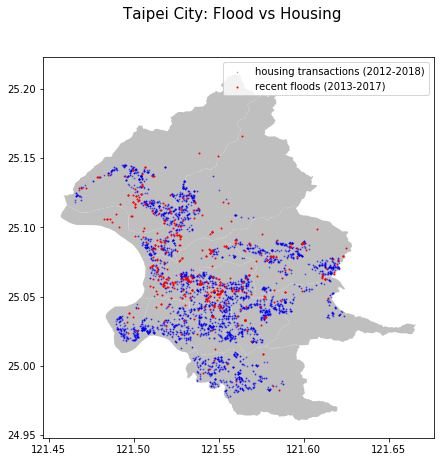

In [21]:
# visualize flood vs. housing data

fig, axes = plt.subplots(figsize=(7, 7) )

taipei.plot(axes = axes,  color = '0.75')
#geoplot.polyplot(taipei, ax=axes, color = '0.75')
gdf_housing.plot(axes=axes, markersize = 0.5, c = 'b', alpha = 0.3, label = 'housing transactions (2012-2018)')
flood.plot(axes=axes, markersize = 1, c = 'r', label = 'recent floods (2013-2017)')


fig.suptitle('Taipei City: Flood vs Housing', fontsize=15)
axes.legend()
plt.plot()

plt.savefig('Taipei City.png')


<font size = '4'> __Further Analysis__<font>
    
<font size = '4'>__Problem Statement: How does the occurrence of hydrological events impact urban population’s decisionmaking on housing?__<font>

In [22]:
# Goal: identify flood impacted areas and observe the housing price differences between flood impacted areas and the 
# whole dataset

flood_buffer = flood.geometry.buffer(0.002) # radius about 222m 


flood_impacted_index = []
not_impacted_index = []

for i, row in housing_df.iterrows():
    if any(flood_buffer.intersects(row['geometry'])) == True:
        flood_impacted_index.append(housing_df.index.values[i])
    if any(flood_buffer.intersects(row['geometry'])) == False:
        not_impacted_index.append(housing_df.index.values[i])
    

# house transactions happened in flood impacted areas
flood_impacted = housing_df.sort_index().loc[flood_impacted_index]
gdf_flood_impacted = gpd.GeoDataFrame(flood_impacted, geometry= 'geometry')

# house transactions happened in flood free areas
not_impacted = housing_df.sort_index().loc[not_impacted_index]
gdf_not_impacted = gpd.GeoDataFrame(not_impacted, geometry= 'geometry')

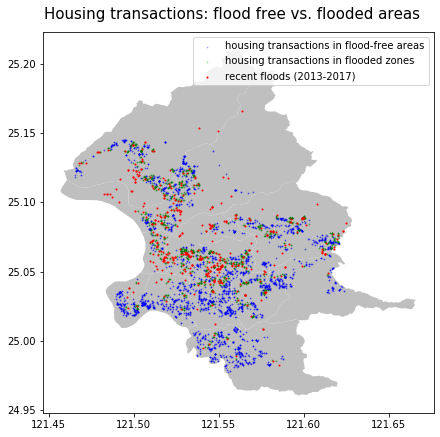

In [23]:
# visualize flood-free vs flood prone areas

fig,axes = plt.subplots(figsize=(7, 7) )


taipei.plot(axes = axes,  color = '0.75')
gdf_not_impacted.plot(axes=axes, markersize = 0.5, c = 'b', alpha = 0.3, label = 'housing transactions in flood-free areas')
gdf_flood_impacted.plot(axes=axes, markersize = 0.5, alpha = 0.3, c = 'g', label = 'housing transactions in flooded zones')
flood.plot(axes=axes, markersize = 1, c = 'r', label = 'recent floods (2013-2017)')

fig.suptitle('Housing transactions: flood free vs. flooded areas', fontsize=15, y = 0.93)

axes.legend()

plt.plot()
plt.savefig('flood_free_vs_flooded.png')

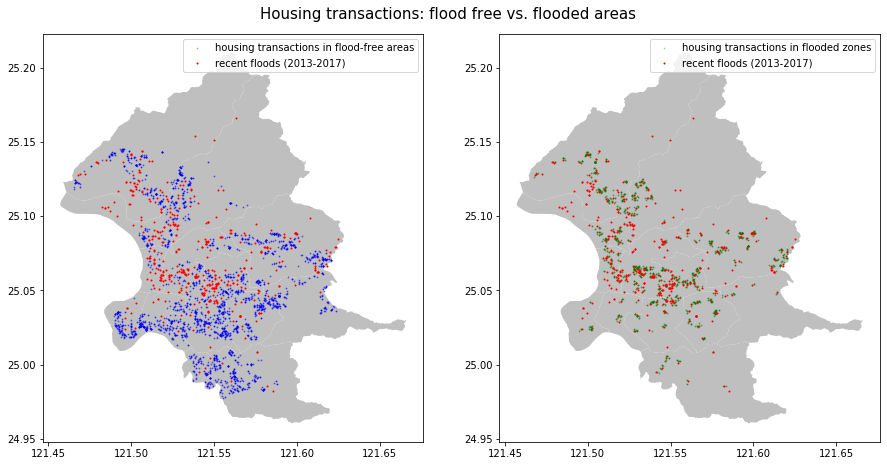

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7.5) )

# Axes 0: Taipei City housing transactions in flood free areas
taipei.plot(axes = axes[0],  color = '0.75')
gdf_not_impacted.plot(axes=axes[0], markersize = 0.5, c = 'b', alpha = 0.3, label = 'housing transactions in flood-free areas')
flood.plot(axes=axes[0], markersize = 1, c = 'r', label = 'recent floods (2013-2017)')


# Axes 1: flood impacted housing transactions
taipei.plot(axes = axes[1],  color = '0.75')

gdf_flood_impacted.plot(axes=axes[1], markersize = 0.5, alpha = 0.3, c = 'g', label = 'housing transactions in flooded zones')
flood.plot(axes=axes[1], markersize = 1, c = 'r', label = 'recent floods (2013-2017)')

fig.suptitle('Housing transactions: flood free vs. flooded areas', fontsize=15, y = 0.93)

axes[0].legend()
axes[1].legend()

plt.plot()
plt.savefig('flood_free_vs_flooded_comparison.png')


In [25]:
# average price per sqm of all flood free housing transactions from 2012-2018
print('average price per sqm of all flood free housing transactions from 2012-2018:{}'.format(not_impacted['price_per_sqm'].astype(int).mean()))


# average price per sqm of all flood free housing transactions of 1st floor units from 2012-2018
not_impacted_1_floor = not_impacted.loc[not_impacted['transaction_floor']=='一層']
print('average price per sqm of all flood free housing transactions of 1st floor units:{}'.format(not_impacted_1_floor['price_per_sqm'].astype(int).mean()))

average price per sqm of all flood free housing transactions from 2012-2018:165566.9127804878
average price per sqm of all flood free housing transactions of 1st floor units:190138.8968058968


In [26]:
# average price per sqm of flood impacted housing transactions from 2012-2018
print('average price per sqm of all flood prone housing transactions from 2012-2018:{}'.format(flood_impacted['price_per_sqm'].astype(int).mean()))


# average price per sqm of flood impacted housing transactions of 1st floor units from 2012-2018
flood_impacted_1_floor = flood_impacted.loc[flood_impacted['transaction_floor']=='一層']
print('average price per sqm of all flood prone housing transactions of 1st floor units:{}'.format(flood_impacted_1_floor['price_per_sqm'].astype(int).mean()))

# result: house transaction price per sqm is slightly higher in flood-prone areas, which is against my hypothesis.

average price per sqm of all flood prone housing transactions from 2012-2018:170875.20782889426
average price per sqm of all flood prone housing transactions of 1st floor units:200479.56306306308


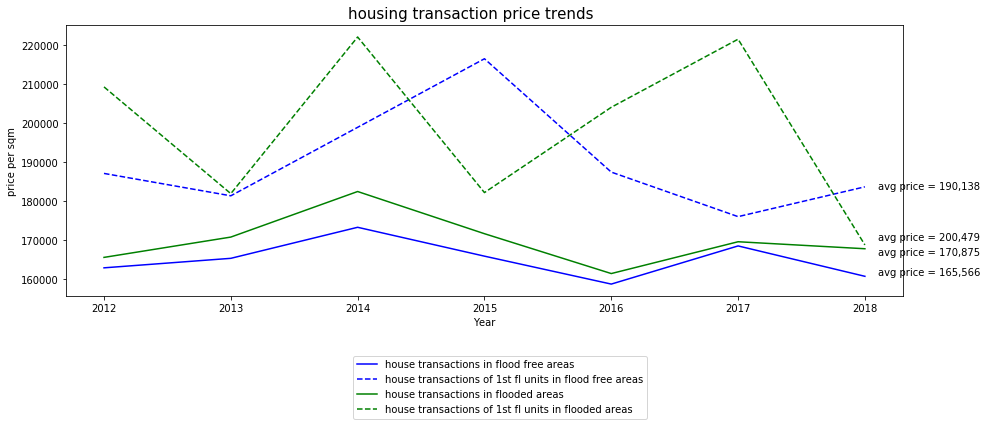

<Figure size 432x288 with 0 Axes>

In [27]:
# Visualize price trends

# House transaction price trend of flood free areas
not_impacted_2012 = not_impacted.loc[not_impacted['transaction_date']<20130000]['price_per_sqm'].astype(int).mean()
not_impacted_2013 = not_impacted.loc[(not_impacted['transaction_date']<20140000) & 
                                     (not_impacted['transaction_date']>20130000)]['price_per_sqm'].astype(int).mean()
not_impacted_2014 = not_impacted.loc[(not_impacted['transaction_date']<20150000) & 
                                     (not_impacted['transaction_date']>20140000)]['price_per_sqm'].astype(int).mean()
not_impacted_2015 = not_impacted.loc[(not_impacted['transaction_date']<20160000) & 
                                     (not_impacted['transaction_date']>20150000)]['price_per_sqm'].astype(int).mean()
not_impacted_2016 = not_impacted.loc[(not_impacted['transaction_date']<20170000) & 
                                     (not_impacted['transaction_date']>20160000)]['price_per_sqm'].astype(int).mean()
not_impacted_2017 = not_impacted.loc[(not_impacted['transaction_date']<20180000) & 
                                     (not_impacted['transaction_date']>20170000)]['price_per_sqm'].astype(int).mean()
not_impacted_2018 = not_impacted.loc[(not_impacted['transaction_date']<20190000) & 
                                     (not_impacted['transaction_date']>20180000)]['price_per_sqm'].astype(int).mean()

not_impacted_price_trend = pd.Series([not_impacted_2012, not_impacted_2013, not_impacted_2014, not_impacted_2015,
                           not_impacted_2016, not_impacted_2017, not_impacted_2018], 
                                     index = [2012, 2013, 2014, 2015, 2016, 2017, 2018])


# House transaction price trend of flood impacted areas...using loop is efficient!
flood_impacted_price_trend=[]

for i in range(7): 
    flood_impacted_price_trend.append(flood_impacted.loc[(flood_impacted['transaction_date']<20130000+10000*i) & 
                                     (flood_impacted['transaction_date']>20120000+10000*i)]['price_per_sqm'].astype(int).mean())

flood_impacted_price_trend = pd.Series(flood_impacted_price_trend, 
                                       index = [2012, 2013, 2014, 2015, 2016, 2017, 2018])


# House transaction price trend of 1st fl units in flood free areas
not_impacted_1_floor_price_trend=[]

for i in range(7): 
    not_impacted_1_floor_price_trend.append(not_impacted_1_floor.loc[(not_impacted_1_floor['transaction_date']<20130000+10000*i) & 
                                     (not_impacted_1_floor['transaction_date']>20120000+10000*i)]['price_per_sqm'].astype(int).mean())

not_impacted_1_floor_price_trend = pd.Series(not_impacted_1_floor_price_trend, 
                                       index = [2012, 2013, 2014, 2015, 2016, 2017, 2018])

# House transaction price trend of flood impacted areas...using loop is efficient!
flood_impacted_1_floor_price_trend=[]

for i in range(7): 
    flood_impacted_1_floor_price_trend.append(flood_impacted_1_floor.loc[(flood_impacted_1_floor['transaction_date']<20130000+10000*i) & 
                                     (flood_impacted_1_floor['transaction_date']>20120000+10000*i)]['price_per_sqm'].astype(int).mean())

flood_impacted_1_floor_price_trend = pd.Series(flood_impacted_1_floor_price_trend, 
                                       index = [2012, 2013, 2014, 2015, 2016, 2017, 2018])


# plot these trends in one graph
fig, axes = plt.subplots(figsize=(15, 5) )

not_impacted_price_trend.plot(axes=axes, c = 'b', label = 'house transactions in flood free areas')
not_impacted_1_floor_price_trend.plot(linestyle = '--', axes=axes, c = 'b', label = 'house transactions of 1st fl units in flood free areas')

flood_impacted_price_trend.plot(axes=axes, c = 'g', label = 'house transactions in flooded areas')
flood_impacted_1_floor_price_trend.plot(linestyle = '--', axes=axes, c = 'g', label = 'house transactions of 1st fl units in flooded areas')



fig.suptitle('housing transaction price trends', fontsize=15, y = 0.93)
plt.xlabel('Year')
plt.ylabel('price per sqm')
axes.legend(bbox_to_anchor=(0.7, -0.2))


axes.text(2018.1, 170000, 'avg price = 200,479')
axes.text(2018.1, 183000, 'avg price = 190,138')
axes.text(2018.1, 161000, 'avg price = 165,566')
axes.text(2018.1, 166000, 'avg price = 170,875')


plt.show()
plt.savefig('housing_transaction_price_trends.png')

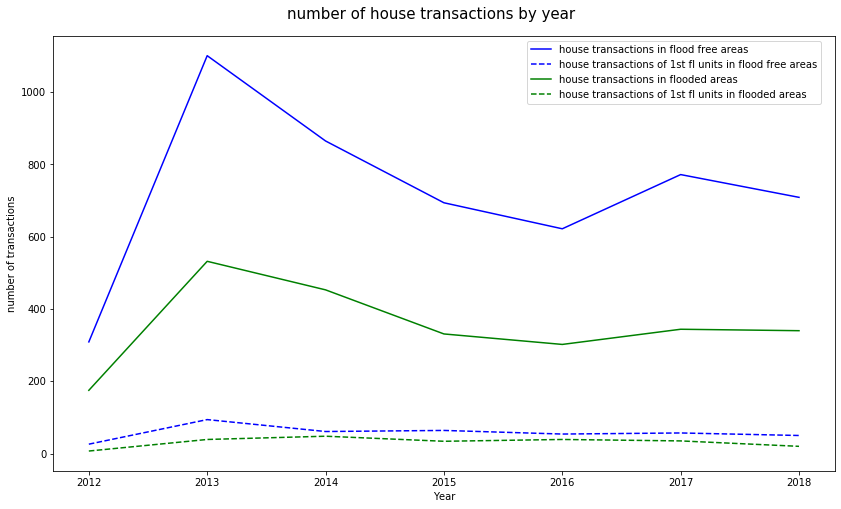

<Figure size 432x288 with 0 Axes>

In [28]:
# Count the number of transactions by year

# flood free areas
not_impacted_trans_no=[]

for i in range(7): 
    not_impacted_trans_no.append(not_impacted.loc[(not_impacted['transaction_date']<20130000+10000*i) & 
                                     (not_impacted['transaction_date']>20120000+10000*i)]['price_per_sqm'].count())

not_impacted_trans_no = pd.Series(not_impacted_trans_no, 
                                       index = [2012, 2013, 2014, 2015, 2016, 2017, 2018])

# flooded areas
flood_impacted_trans_no=[]

for i in range(7): 
    flood_impacted_trans_no.append(flood_impacted.loc[(flood_impacted['transaction_date']<20130000+10000*i) & 
                                     (flood_impacted['transaction_date']>20120000+10000*i)]['price_per_sqm'].astype(int).count())

flood_impacted_trans_no = pd.Series(flood_impacted_trans_no, 
                                       index = [2012, 2013, 2014, 2015, 2016, 2017, 2018])


# 1st fl units in flood free areas
not_impacted_1_floor_trans_no=[]

for i in range(7): 
    not_impacted_1_floor_trans_no.append(not_impacted_1_floor.loc[(not_impacted_1_floor['transaction_date']<20130000+10000*i) & 
                                     (not_impacted_1_floor['transaction_date']>20120000+10000*i)]['price_per_sqm'].count())

not_impacted_1_floor_trans_no = pd.Series(not_impacted_1_floor_trans_no, 
                                       index = [2012, 2013, 2014, 2015, 2016, 2017, 2018])

# 1st fl units in flooded areas
flood_impacted_1_floor_trans_no=[]

for i in range(7): 
    flood_impacted_1_floor_trans_no.append(flood_impacted_1_floor.loc[(flood_impacted_1_floor['transaction_date']<20130000+10000*i) & 
                                     (flood_impacted_1_floor['transaction_date']>20120000+10000*i)]['price_per_sqm'].astype(int).count())

flood_impacted_1_floor_trans_no = pd.Series(flood_impacted_1_floor_trans_no, 
                                       index = [2012, 2013, 2014, 2015, 2016, 2017, 2018])


# plot these trends in one graph
fig, axes = plt.subplots(figsize=(14, 8) )

not_impacted_trans_no.plot(axes=axes, c = 'b', label = 'house transactions in flood free areas')
not_impacted_1_floor_trans_no.plot(linestyle = '--', axes=axes, c = 'b', label = 'house transactions of 1st fl units in flood free areas')

flood_impacted_trans_no.plot(axes=axes, c = 'g', label = 'house transactions in flooded areas')
flood_impacted_1_floor_trans_no.plot(linestyle = '--', axes=axes, c = 'g', label = 'house transactions of 1st fl units in flooded areas')



fig.suptitle('number of house transactions by year', fontsize=15, y = 0.93)
plt.xlabel('Year')
plt.ylabel('number of transactions')
axes.legend(bbox_to_anchor=(0.6, 1))

plt.show()

plt.savefig('number of house transactions by year.png')

In [29]:
# sort the house transaction data by transaction dates
not_impacted_sort = not_impacted.sort_values(by = 'transaction_date')

# the average change of transaction price per sqm for the housing data 
price_change = ((not_impacted_sort['price_per_sqm'].astype(int).groupby(not_impacted['address']).last()-
                not_impacted_sort['price_per_sqm'].astype(int).groupby(not_impacted['address']).first())/
                not_impacted_sort['price_per_sqm'].astype(int).groupby(not_impacted['address']).first())
price_change.mean()

0.09445984136084218

In [30]:
# the average change of transaction price per sqm for the 1st floor units 
price_change_1_floor = ((not_impacted_sort.loc[not_impacted_sort['transaction_floor']=='一層']
                         ['price_per_sqm'].astype(int).groupby(not_impacted['address']).last()-
                         not_impacted_sort.loc[not_impacted_sort['transaction_floor']=='一層']
                         ['price_per_sqm'].astype(int).groupby(not_impacted['address']).first())/
                        not_impacted_sort.loc[not_impacted_sort['transaction_floor']=='一層']
                        ['price_per_sqm'].astype(int).groupby(not_impacted['address']).first())
price_change_1_floor.mean()

0.03289194964432659

In [31]:
# sort the house transaction data by transaction dates
flood_impacted_sort = flood_impacted.sort_values(by = 'transaction_date')

# the average change of transaction price per sqm for the housing data in flood impacted areas
flood_impacted_price_change = ((flood_impacted_sort['price_per_sqm'].astype(int).groupby(flood_impacted['address']).last()-
                flood_impacted_sort['price_per_sqm'].astype(int).groupby(flood_impacted['address']).first())/
                flood_impacted_sort['price_per_sqm'].astype(int).groupby(flood_impacted['address']).first())
flood_impacted_price_change.mean()

0.1096090078836273

In [32]:
# the average change of transaction price per sqm for the 1st floor units in flood impacted areas
flood_impacted_price_change_1_floor = ((flood_impacted_sort.loc[flood_impacted_sort['transaction_floor']=='一層']
                                        ['price_per_sqm'].astype(int).groupby(flood_impacted['address']).last()-
                                        flood_impacted_sort.loc[flood_impacted_sort['transaction_floor']=='一層']
                                        ['price_per_sqm'].astype(int).groupby(flood_impacted['address']).first())/
                                       flood_impacted_sort.loc[flood_impacted_sort['transaction_floor']=='一層']
                                       ['price_per_sqm'].astype(int).groupby(flood_impacted['address']).first())
flood_impacted_price_change_1_floor.mean()


# Result: home price growth rate is slightly higher in flood prone areas, which is not aligned with my hypothesis.
# But interestingly, home price growth rate for units in 1st floor seemed lower than the overall growth rate.


0.03908000225099088

/srv/app/venv/lib/python3.6/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


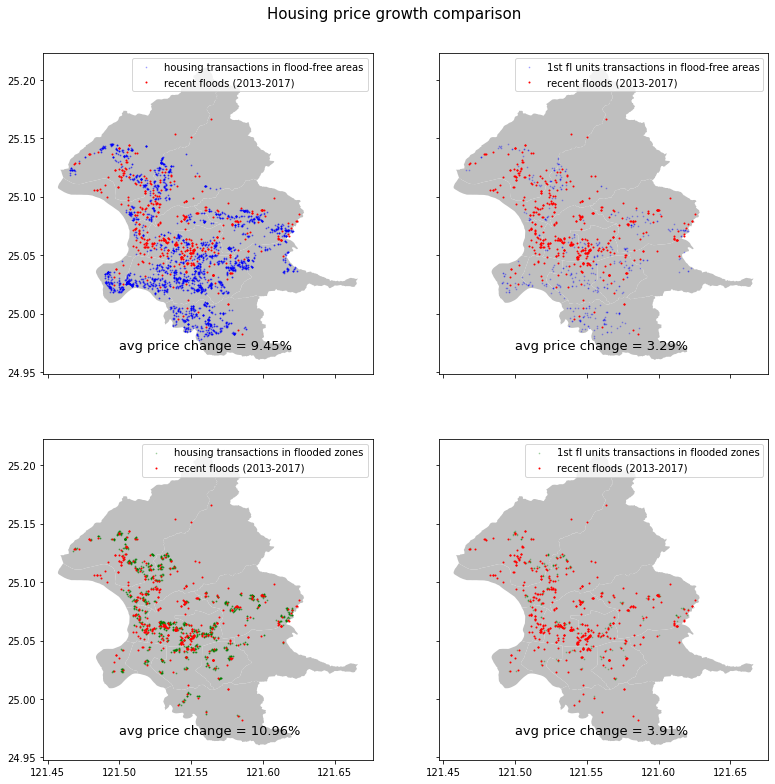

In [33]:
# first try to visualize the different price growth trends

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(13, 13) )

# Axes 0: Taipei City housing transactions in flood free areas
taipei.plot(axes = axes[0][0],  color = '0.75')
gdf_not_impacted.plot(axes=axes[0][0], markersize = 0.5, c = 'b', alpha = 0.3, label = 'housing transactions in flood-free areas')
flood.plot(axes=axes[0][0], markersize = 1, c = 'r', label = 'recent floods (2013-2017)')
axes[0][0].text(121.5, 24.97, 'avg price change = 9.45%', fontsize = 13)


# Axes 1: flood impacted housing transactions
taipei.plot(axes = axes[1][0],  color = '0.75')

gdf_flood_impacted.plot(axes=axes[1][0], markersize = 0.5, alpha = 0.3, c = 'g', label = 'housing transactions in flooded zones')
flood.plot(axes=axes[1][0], markersize = 1, c = 'r', label = 'recent floods (2013-2017)')
axes[1][0].text(121.5, 24.97, 'avg price change = 10.96%', fontsize = 13)


# Axes 2: Taipei City housing transactions of 1st floor units in flood free areas
taipei.plot(axes = axes[0][1],  color = '0.75')
gdf_not_impacted.loc[not_impacted_sort['transaction_floor']=='一層'].plot(axes=axes[0][1], markersize = 0.5, c = 'b', alpha = 0.3, label = '1st fl units transactions in flood-free areas')
flood.plot(axes=axes[0][1], markersize = 1, c = 'r', label = 'recent floods (2013-2017)')
axes[0][1].text(121.5, 24.97, 'avg price change = 3.29%', fontsize = 13)


# Axes 3: housing transactions of 1st floor units in flood prone areas
taipei.plot(axes = axes[1][1],  color = '0.75')
gdf_flood_impacted.loc[flood_impacted_sort['transaction_floor']=='一層'].plot(axes=axes[1][1], markersize = 0.5, alpha = 0.3, c = 'g', label = '1st fl units transactions in flooded zones')
flood.plot(axes=axes[1][1], markersize = 1, c = 'r', label = 'recent floods (2013-2017)')
axes[1][1].text(121.5, 24.97, 'avg price change = 3.91%', fontsize = 13)


fig.suptitle('Housing price growth comparison', fontsize=15, y = 0.93)

axes[0][0].legend()
axes[0][1].legend()
axes[1][0].legend()
axes[1][1].legend()

plt.plot()
plt.savefig('Housing price growth comparison.png')

/srv/app/venv/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/app/venv/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


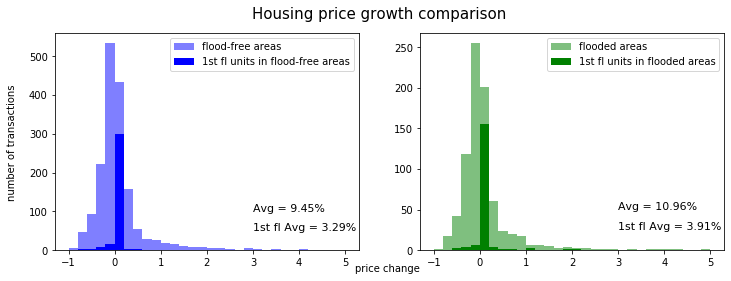

In [34]:
# second try to visualize the different price growth trends --- seems better!

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4) )
axes[0].hist(price_change, bins = 30, range = (-1, 5), alpha = 0.5, color = 'b', label = 'flood-free areas')
axes[0].text(3, 100, 'Avg = 9.45%', fontsize = 11)
axes[0].hist(price_change_1_floor, bins = 30, range = (-1, 5), alpha = 1, color = 'b', 
                label = '1st fl units in flood-free areas')
axes[0].text(3, 50, '1st fl Avg = 3.29%', fontsize = 11)

axes[1].hist(flood_impacted_price_change, bins = 30, range = (-1, 5), color = 'g', alpha = 0.5,
                label = 'flooded areas')
axes[1].text(3, 50, 'Avg = 10.96%', fontsize = 11)
axes[1].hist(flood_impacted_price_change_1_floor, bins = 30, range = (-1, 5), alpha = 1, color = 'g', 
                label = '1st fl units in flooded areas')
axes[1].text(3, 25, '1st fl Avg = 3.91%', fontsize = 11)

fig.suptitle('Housing price growth comparison', fontsize=15, y = 0.97)


fig.text(0.51, 0.05, 'price change', ha='center')
fig.text(0.07, 0.5, 'number of transactions', va='center', rotation='vertical')

axes[0].legend()
axes[1].legend()


plt.plot()
plt.savefig('hist_Housing price growth comparison.png')

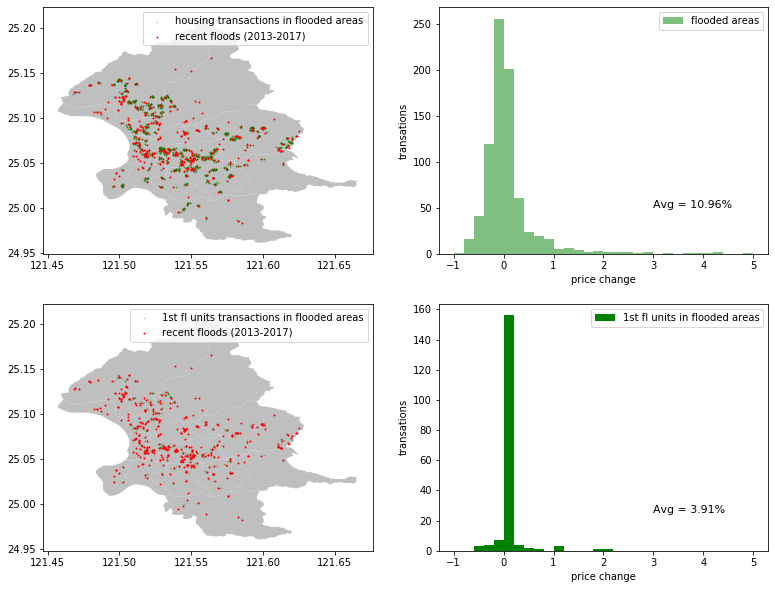

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 10) )

# Axes 0: Taipei City housing transactions in flood free areas
taipei.plot(axes = axes[0][0],  color = '0.75')
gdf_flood_impacted.plot(axes=axes[0][0], markersize = 0.5, c = 'g', alpha = 0.3, label = 'housing transactions in flooded areas')
flood.plot(axes=axes[0][0], markersize = 1, c = 'r', label = 'recent floods (2013-2017)')

# Axes 1: Taipei City housing transactions of 1st floor units in flood free areas
taipei.plot(axes = axes[1][0],  color = '0.75')
gdf_flood_impacted.loc[flood_impacted_sort['transaction_floor']=='一層'].plot(axes=axes[1][0], markersize = 0.5, c = 'g', alpha = 0.3, label = '1st fl units transactions in flooded areas')
flood.plot(axes=axes[1][0], markersize = 1, c = 'r', label = 'recent floods (2013-2017)')

# Axes 2: histogram of transactions in flood free areas
axes[0][1].hist(flood_impacted_price_change, bins = 30, range = (-1, 5), alpha = 0.5, color = 'g', label = 'flooded areas')
axes[0][1].text(3, 50, 'Avg = 10.96%', fontsize = 11)
axes[0][1].set_xlabel('price change')
axes[0][1].set_ylabel('transations')

# Axes 3: histogram of 1st flr unit transactions in flood free areas
axes[1][1].hist(flood_impacted_price_change_1_floor, bins = 30, range = (-1, 5), alpha = 1, color = 'g', 
                label = '1st fl units in flooded areas')
axes[1][1].text(3, 25, 'Avg = 3.91%', fontsize = 11)
axes[1][1].set_xlabel('price change')
axes[1][1].set_ylabel('transations')

axes[0][0].legend()
axes[0][1].legend()
axes[1][0].legend()
axes[1][1].legend()

plt.plot()
plt.savefig('Housing price flooded.png')

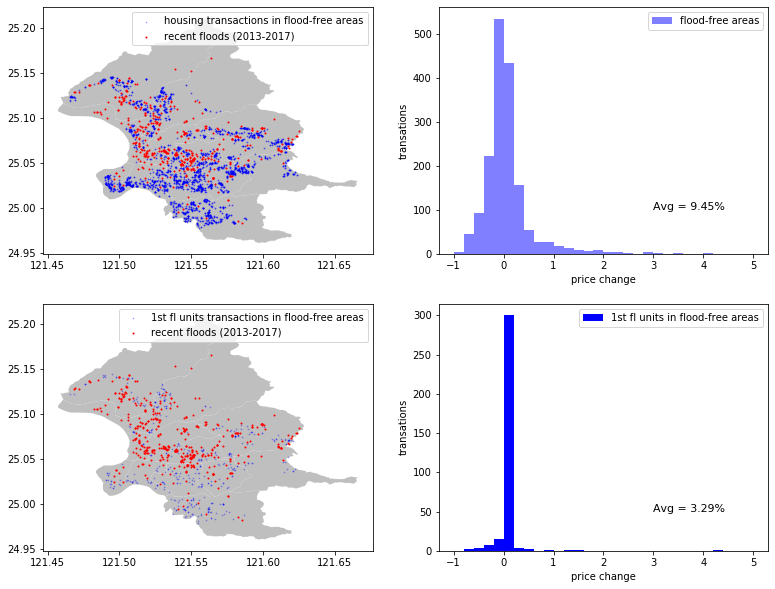

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 10) )

# Axes 0: Taipei City housing transactions in flood free areas
taipei.plot(axes = axes[0][0],  color = '0.75')
gdf_not_impacted.plot(axes=axes[0][0], markersize = 0.5, c = 'b', alpha = 0.3, label = 'housing transactions in flood-free areas')
flood.plot(axes=axes[0][0], markersize = 1, c = 'r', label = 'recent floods (2013-2017)')

# Axes 1: Taipei City housing transactions of 1st floor units in flood free areas
taipei.plot(axes = axes[1][0],  color = '0.75')
gdf_not_impacted.loc[not_impacted_sort['transaction_floor']=='一層'].plot(axes=axes[1][0], markersize = 0.5, c = 'b', alpha = 0.3, label = '1st fl units transactions in flood-free areas')
flood.plot(axes=axes[1][0], markersize = 1, c = 'r', label = 'recent floods (2013-2017)')

# Axes 2: histogram of transactions in flood free areas
axes[0][1].hist(price_change, bins = 30, range = (-1, 5), alpha = 0.5, color = 'b', label = 'flood-free areas')
axes[0][1].text(3, 100, 'Avg = 9.45%', fontsize = 11)
axes[0][1].set_xlabel('price change')
axes[0][1].set_ylabel('transations')

# Axes 3: histogram of 1st flr unit transactions in flood free areas
axes[1][1].hist(price_change_1_floor, bins = 30, range = (-1, 5), alpha = 1, color = 'b', 
                label = '1st fl units in flood-free areas')
axes[1][1].text(3, 50, 'Avg = 3.29%', fontsize = 11)
axes[1][1].set_xlabel('price change')
axes[1][1].set_ylabel('transations')

axes[0][0].legend()
axes[0][1].legend()
axes[1][0].legend()
axes[1][1].legend()

plt.plot()
plt.savefig('Housing price flood free.png')